# HEAT EQUATIONS

## Top

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [4]:
%matplotlib inline

In [5]:
K = 1

# the function u(t,x,y,z) k's control the precision

def ch_u(t, x, y, z, ka, kb=None, kc=None):
    global K
    if kb is None:
        kb = ka
    if kc is None:
        kc = ka
    convert_number = lambda k:(2*k+1)*np.pi
    # A=(2*ka+1)*np.pi
    # B=(2*kb+1)*np.pi
    # C=(2*kc+1)*np.pi
    RA = convert_number(np.arange(ka))
    RB = convert_number(np.arange(kb))
    RC = convert_number(np.arange(kc))
    XT = np.sin(x*RA)*np.exp(-t*K*(RA**2))/RA
    YT = np.sin(y*RB)*np.exp(-t*K*(RB**2))/RB
    ZT = np.sin(z*RC)*np.exp(-t*K*(RC**2))/RC
    
    return 1280*np.sum(XT.reshape(-1,1,1)*YT.reshape(1,-1,1)*ZT.reshape(1,1,-1))
                
                
        

In [12]:
resolution = 20
depth=30
result = np.zeros([resolution+1,]*3)

t=0

for i in range(1, resolution):
    x = i / resolution
    for j in range(1, resolution):
        y = j / resolution
        for k in range(1, resolution):
            z = k / resolution
            result[i,j,k] = ch_u(t,x,y,z,depth)

In [15]:
SLICE = 5
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.linspace(0, 1, resolution+1)[1:-1]
Y = np.linspace(0, 1, resolution+1)[1:-1]
X, Y = np.meshgrid(X, Y)
Z = result[SLICE][1:-1, 1:-1]
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.1,3.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [6]:
# A package called SciencePlots is required (can get it from pip), see https://github.com/garrettj403/SciencePlots
# plt.style.use(["science","ieee"])

## 1-Dim factor functions

In [8]:
K = 1
# After seperation of variables, the $\Theta(t,x)$ function
def eigen(t, x, ka):
    global K
    convert_number = lambda k:(2*k+1)*np.pi
    # A=(2*ka+1)*np.pi
    # B=(2*kb+1)*np.pi
    # C=(2*kc+1)*np.pi
    RA = convert_number(np.arange(ka))
    XT = np.sin(x.reshape(-1,1)*RA.reshape(1,-1))*np.exp(-t*K*(RA**2))/RA
    return np.sum(XT, axis=1)

In [39]:
x = np.linspace(0,1,300)
r=dict()

In [50]:
for t in [0.05,]:
    r[t] = (x, eigen(t,x,50))

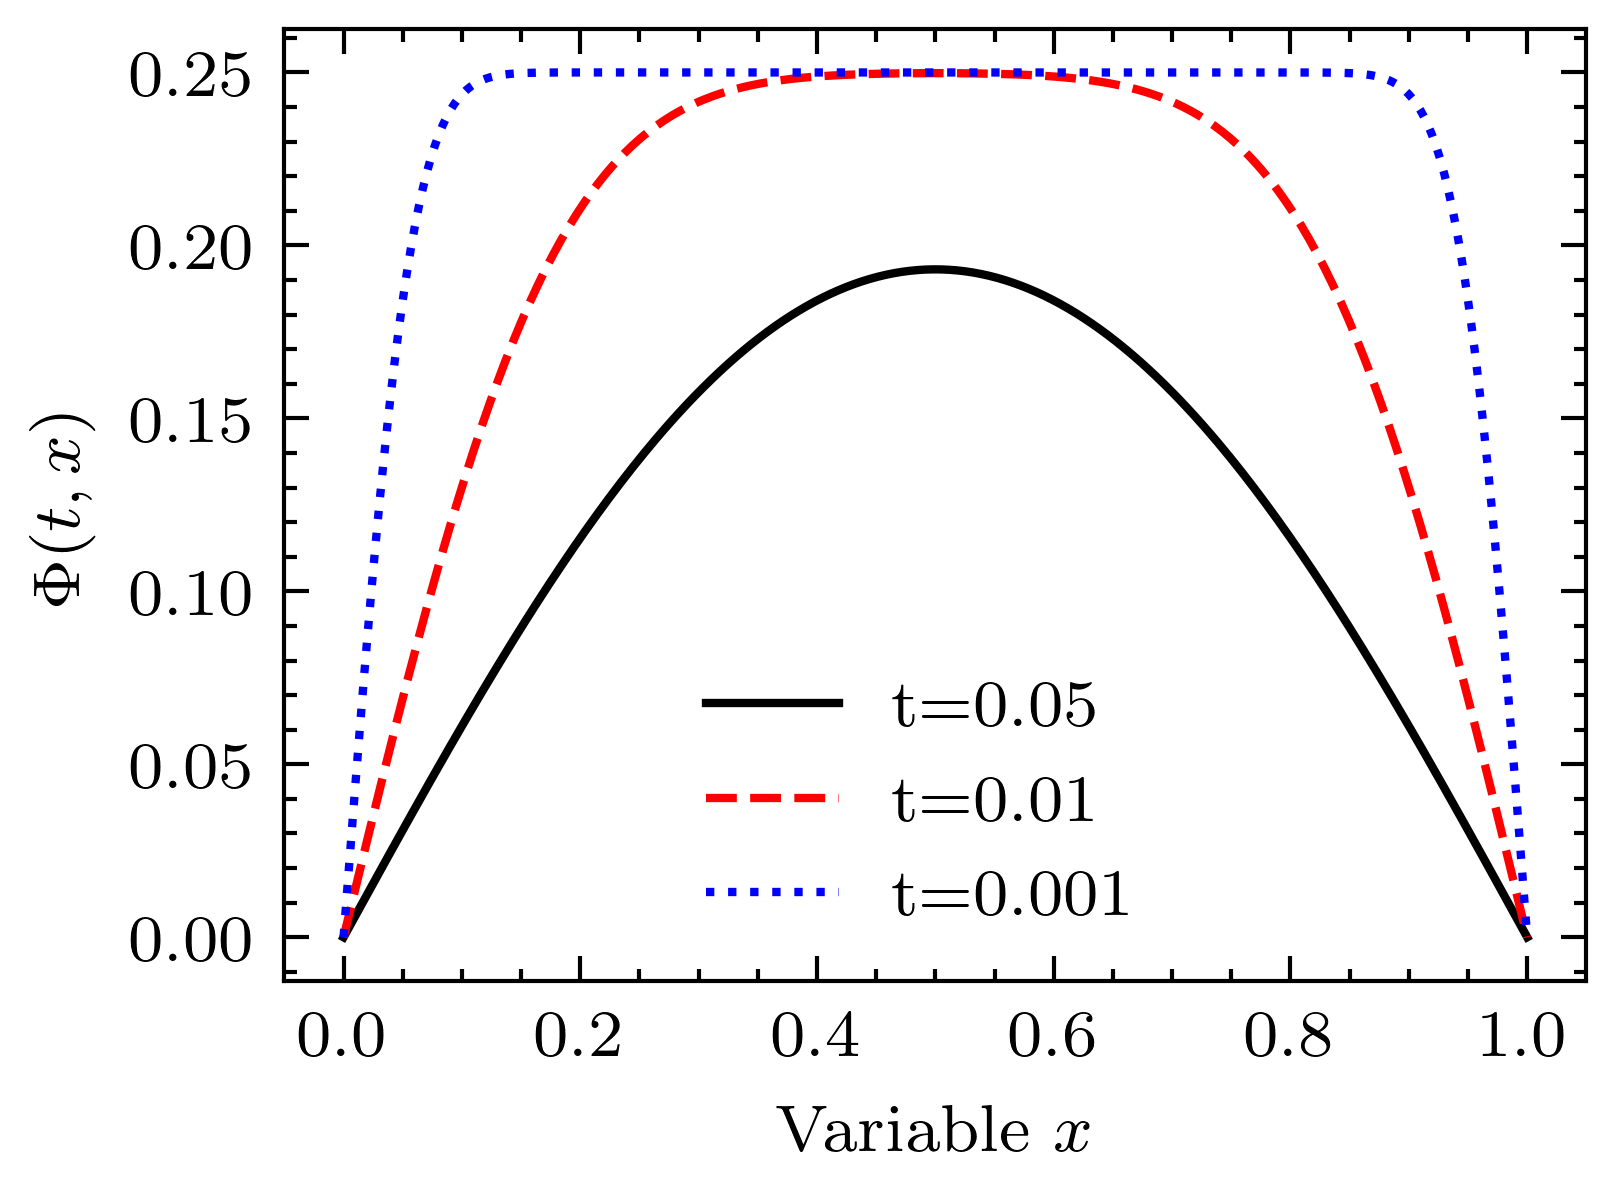

In [88]:
fig = plt.figure(figsize=(2.8,2.1))
ax = fig.add_subplot(1,1,1)
for t in [0.05,0.01,0.001]:
    ax.plot(r[t][0], r[t][1], label="t=%s"%t)
# ax.plot(r[0.1][0], r[0.1][1], label="t=0.01")
ax.set_ylabel("$\\Phi(t,x)$")
ax.set_xlabel("Variable $x$")
fig.legend(loc=(0.42,0.2))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


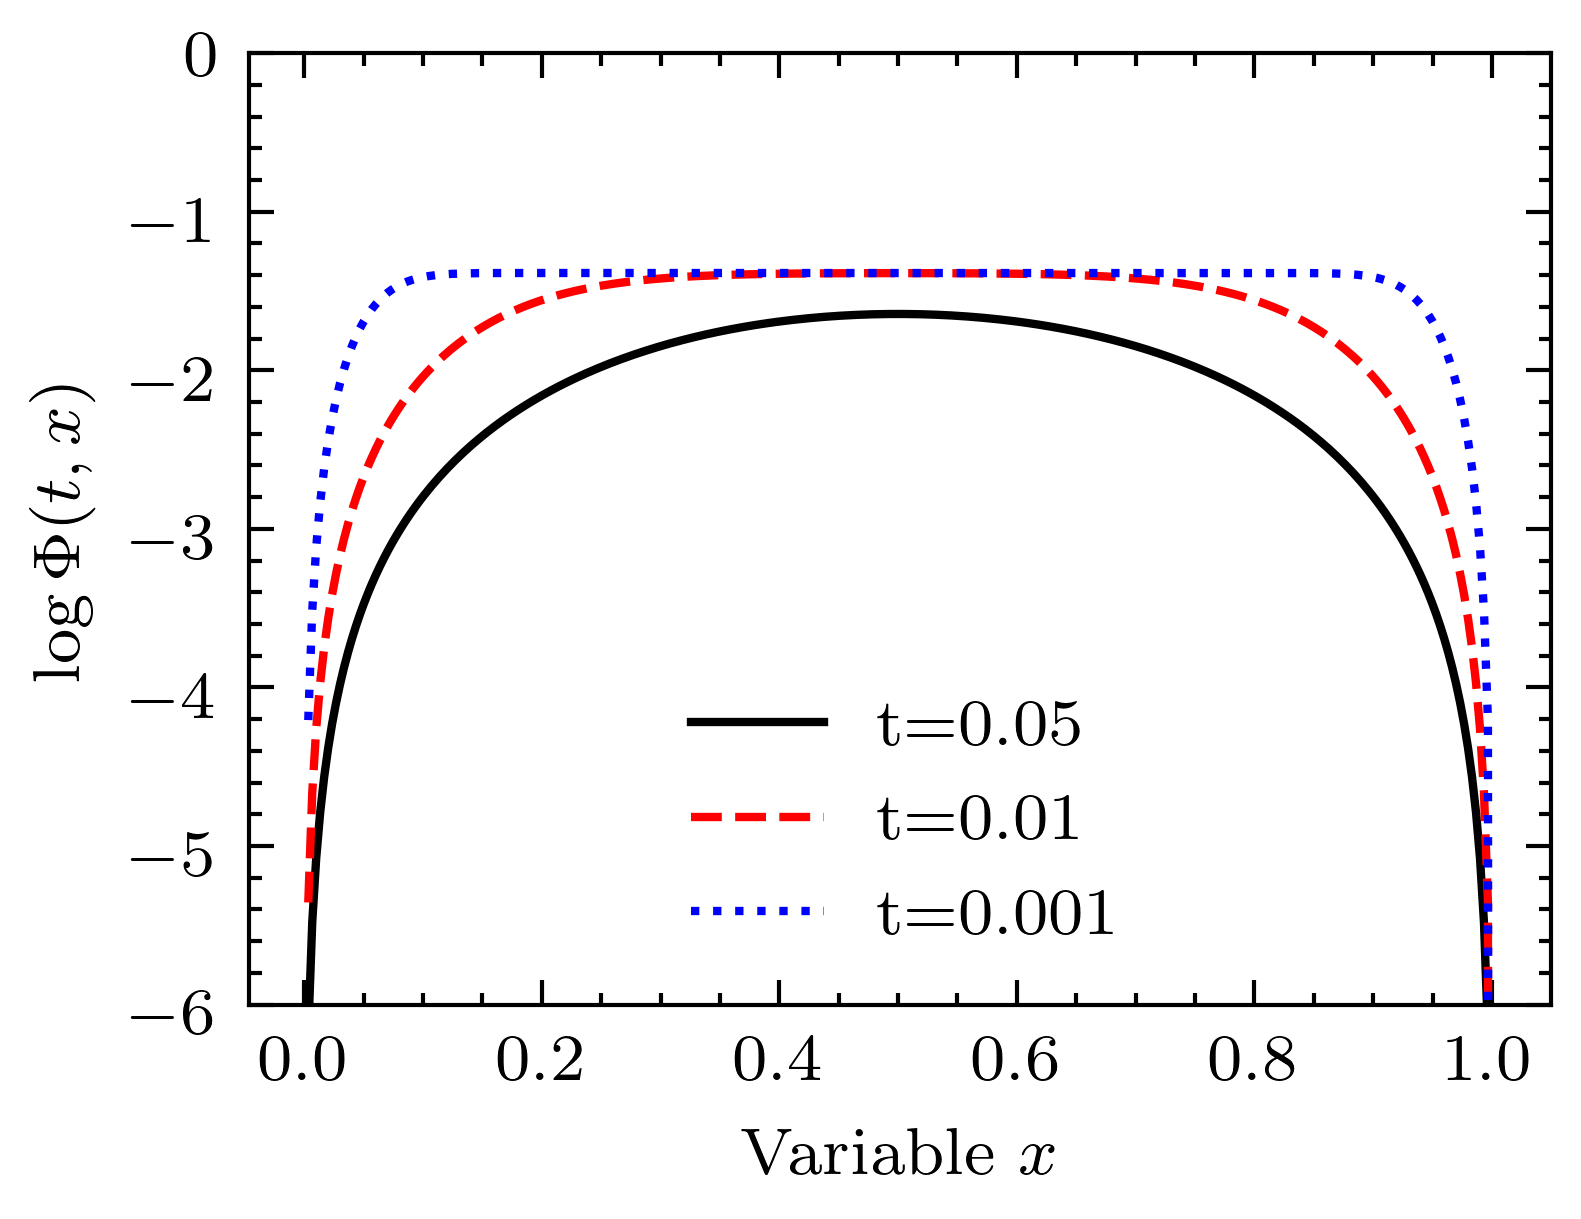

In [101]:
fig = plt.figure(figsize=(2.8,2.1))
ax = fig.add_subplot(1,1,1)
ax.set_ylim(bottom=-6,top=0)
for t in [0.05,0.01,0.001]:
    ax.plot(r[t][0], np.log(r[t][1]), label="t=%s"%t)
# ax.plot(r[0.1][0], r[0.1][1], label="t=0.01")
ax.set_ylabel("$\\log\\Phi(t,x)$")
ax.set_xlabel("Variable $x$")
fig.legend(loc=(0.42,0.2))
plt.show()

In [16]:
x, y=r[0.01]
for i,v in enumerate(x):
    if y[i+100]<=y[i]:
        print(i,v,y[i])
        break


50 0.25125628140703515 0.2310935176427223


In [19]:
np.mean(y[1:-1])

0.19455275737915068

## 3-rd derivative

In [172]:
K = 1

# Third derivative of Theta
def diff3(t, x, ka):
    global K
    convert_number = lambda k:(2*k+1)*np.pi
    # A=(2*ka+1)*np.pi
    # B=(2*kb+1)*np.pi
    # C=(2*kc+1)*np.pi
    RA = convert_number(np.arange(ka))
    XT = -np.cos(x.reshape(-1,1)*RA.reshape(1,-1))*np.exp(-t*K*(RA**2))*RA**2
    return np.sum(XT, axis=1)

In [173]:
d=dict()

In [174]:
for t in [0.05,0.01,0.001]:
    d[t] = (x, diff3(t,x,50))

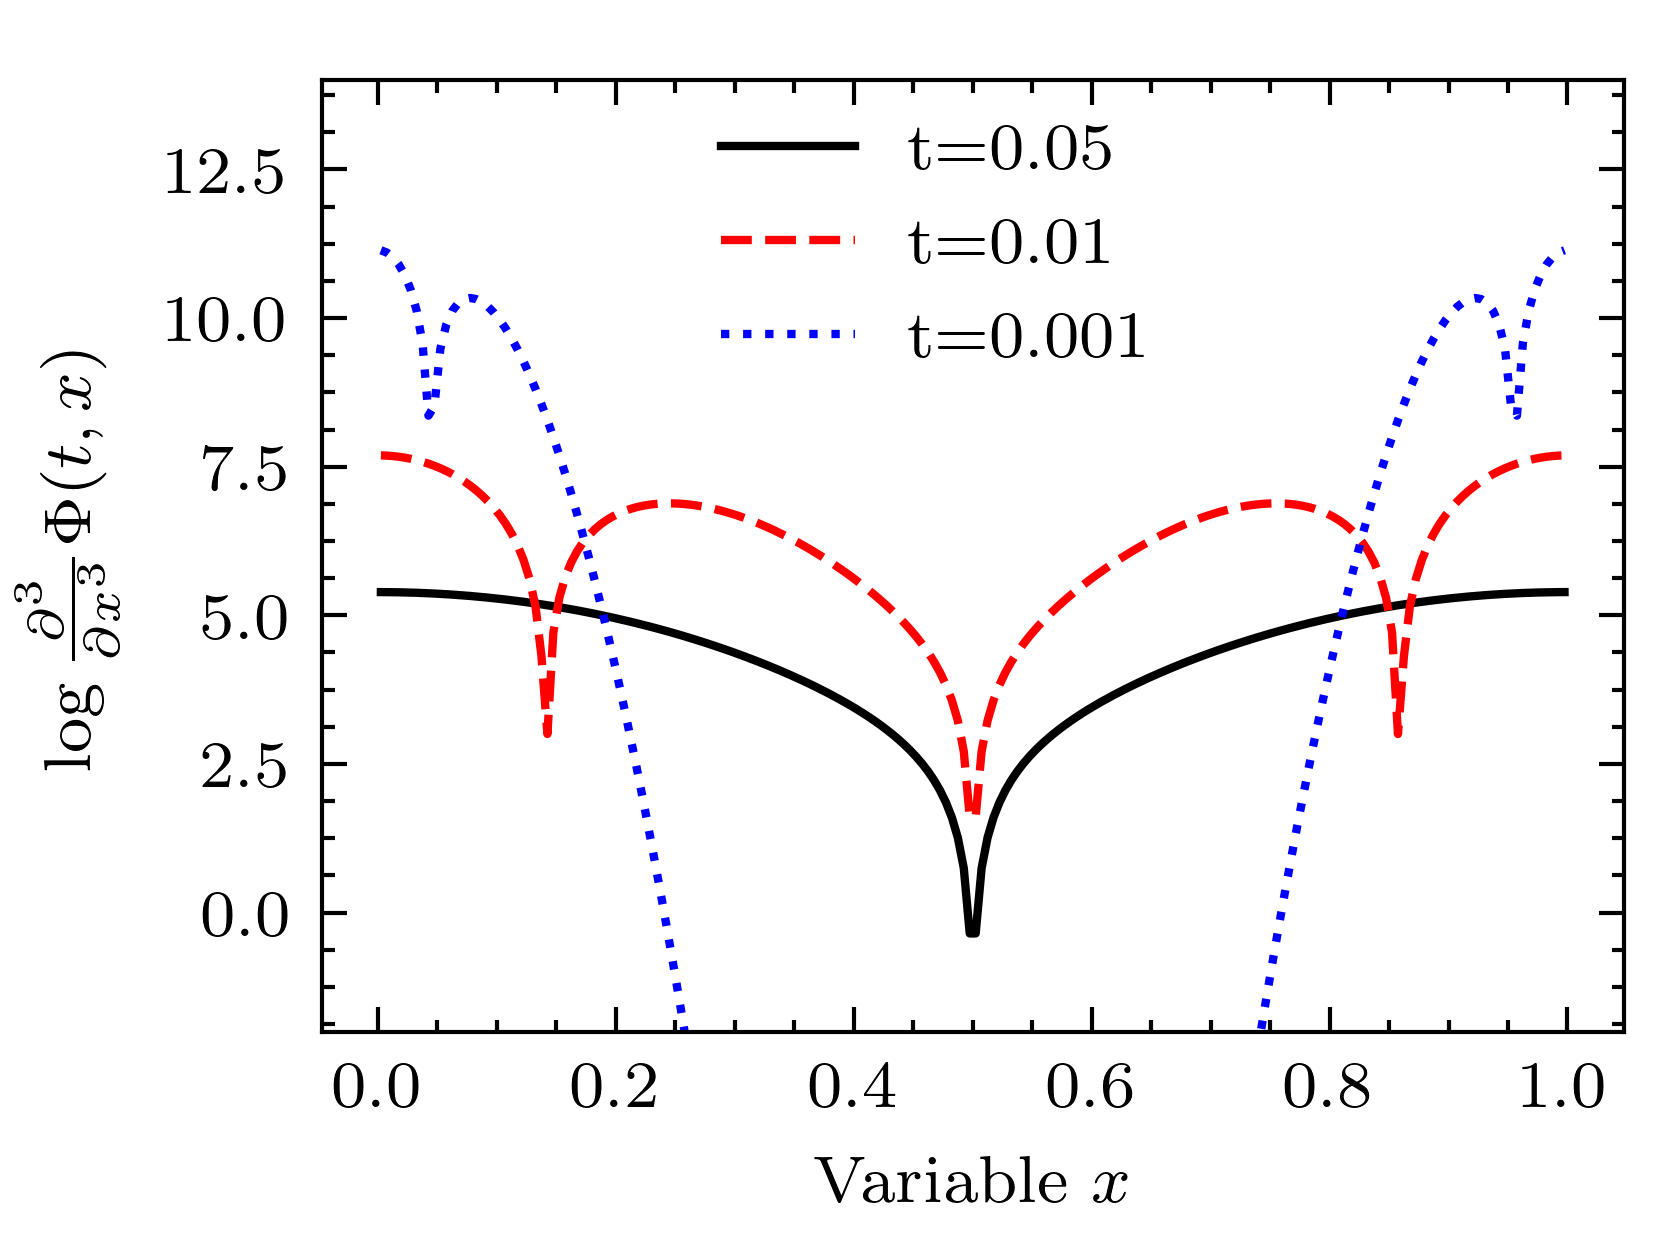

In [181]:
fig = plt.figure(figsize=(2.8,2.1))
ax = fig.add_subplot(1,1,1)
# ax.set_yscale("log")
ax.set_ylim(bottom=-2, top=14)
for t in [0.05,0.01,0.001]:
    ax.plot(d[t][0], np.log(np.abs(d[t][1])*np.pi**3), label="t=%s"%t)
# ax.plot(r[0.1][0], r[0.1][1], label="t=0.01")
ax.set_ylabel("$\\log\\frac{\\partial^3}{\\partial x^3}\\Phi(t,x)$")
ax.set_xlabel("Variable $x$")
fig.legend(loc=(0.42,0.68))
plt.show()

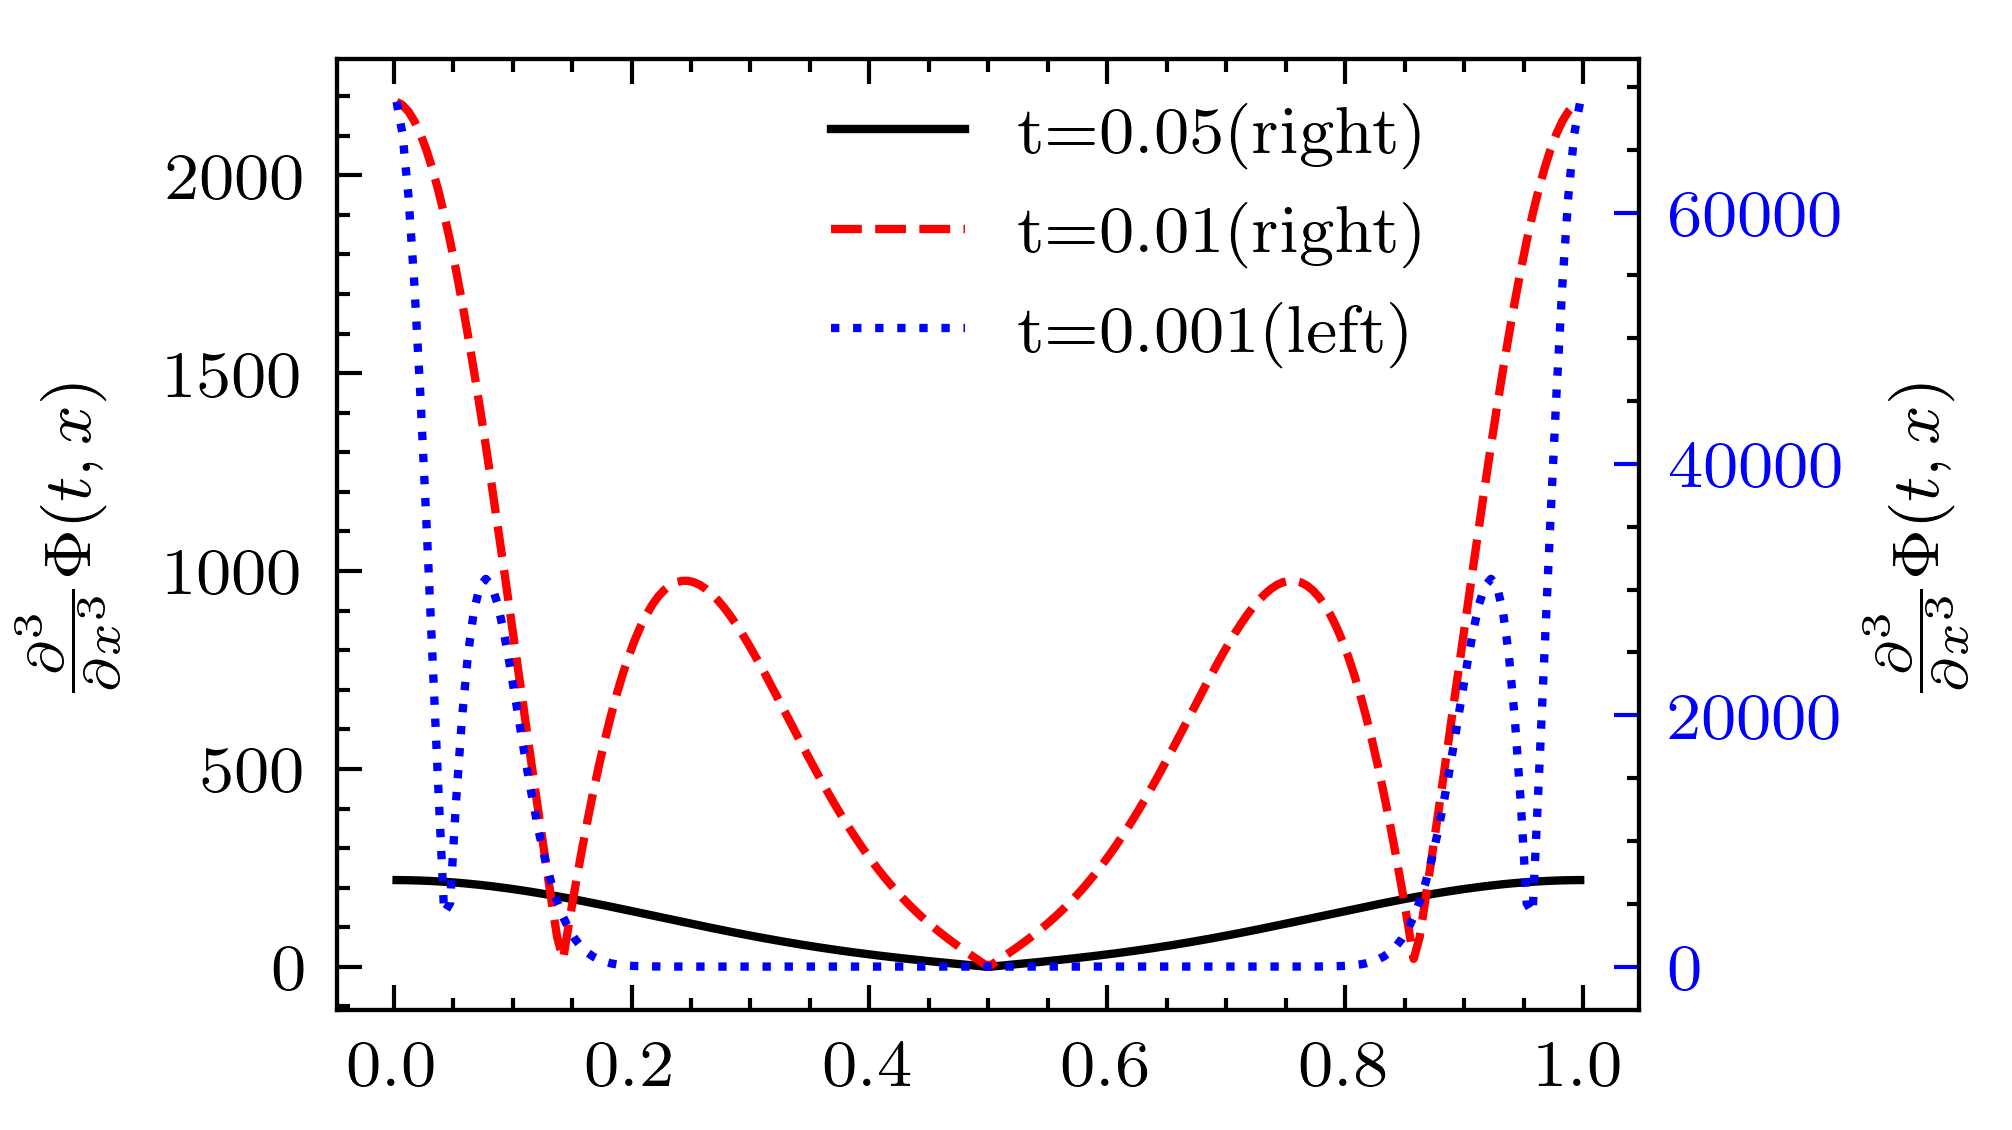

In [179]:
fig = plt.figure(figsize=(2.8,2.1))
ax = fig.add_subplot(1,1,1)
# ax.set_yscale("log")
# ax_t.set_ylim(top=3000)
ax_t = ax.twinx()
ax_t.tick_params(axis="y", colors="blue")
for t in [0.05,0.01]:
    ax.plot(d[t][0], np.pi**3*np.abs(d[t][1]), label="t=%s(right)"%t)
t=0.001
ax_t.plot(d[t][0], np.pi**3*np.abs(d[t][1]),":", label="t=%s(left)"%t, color="blue")
# ax.plot(r[0.1][0], r[0.1][1], label="t=0.01")
ax.set_ylabel("$\\frac{\\partial^3}{\\partial x^3}\\Phi(t,x)$")
ax_t.set_ylabel("$\\frac{\\partial^3}{\\partial x^3}\\Phi(t,x)$")
ax_t.set_xlabel("Variable $x$")
fig.legend(loc=(0.4,0.65))
plt.show()

In [107]:
logs = dict()
for key, val in r.items():
    print(id(val), id(val[0]), id(val[1]))
    logs[key] = (val[0], np.log(val[1]))
    print(id(logs[key]), id(logs[key][0]))

2642600234696 2642701375088 2642701402960
2642718206920 2642701375088
2642610301832 2642701375088 2642676461616
2642600235080 2642701375088
2642601185096 2642701375088 2642632628704
2642713566088 2642701375088
2642677217672 2642701375088 2642717992080
2642569342408 2642701375088


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


## Generate level functions F and G

## Cheating: use grid itself

In [118]:
# eigen and diff3

N=200 # enough?
K=1
thres=70
x=np.linspace(0,1,N,endpoint=False)+0.5/N

In [119]:
data=dict()

In [182]:
HistoResolution = 500
for t in [0.001,0.01,0.05]:
    data[t] = []
    d = np.log(np.abs(diff3(t,x,thres)))

    G0=np.abs(eigen(t,x,thres))
    g0=np.log(G0)

    IG=np.mean(G0)
    g1=np.log(np.abs(G0-G0[100]))
    g2 = np.log(np.abs(G0-IG))
    for g in [g0, g1, g2]:
        A = d.reshape(-1,1,1)+g0.reshape(1,-1,1)+g.reshape(1,1,-1)
        m = np.max(d)+np.max(g0)+np.max(g)
        data[t] += [np.histogram(A, np.log(np.linspace(0,np.exp(m),HistoResolution))),]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [183]:
hitratios[t] = []
hitratios = dict()
for t,histos in data.items():
    hitratios[t]=[]
    for A in histos:
        hitratios[t] += [[A[1][1:], A[0]/N**3],]
        for i in range(1,len(A[0])):
            hitratios[t][-1][1][i] += hitratios[t][-1][1][i-1]
    

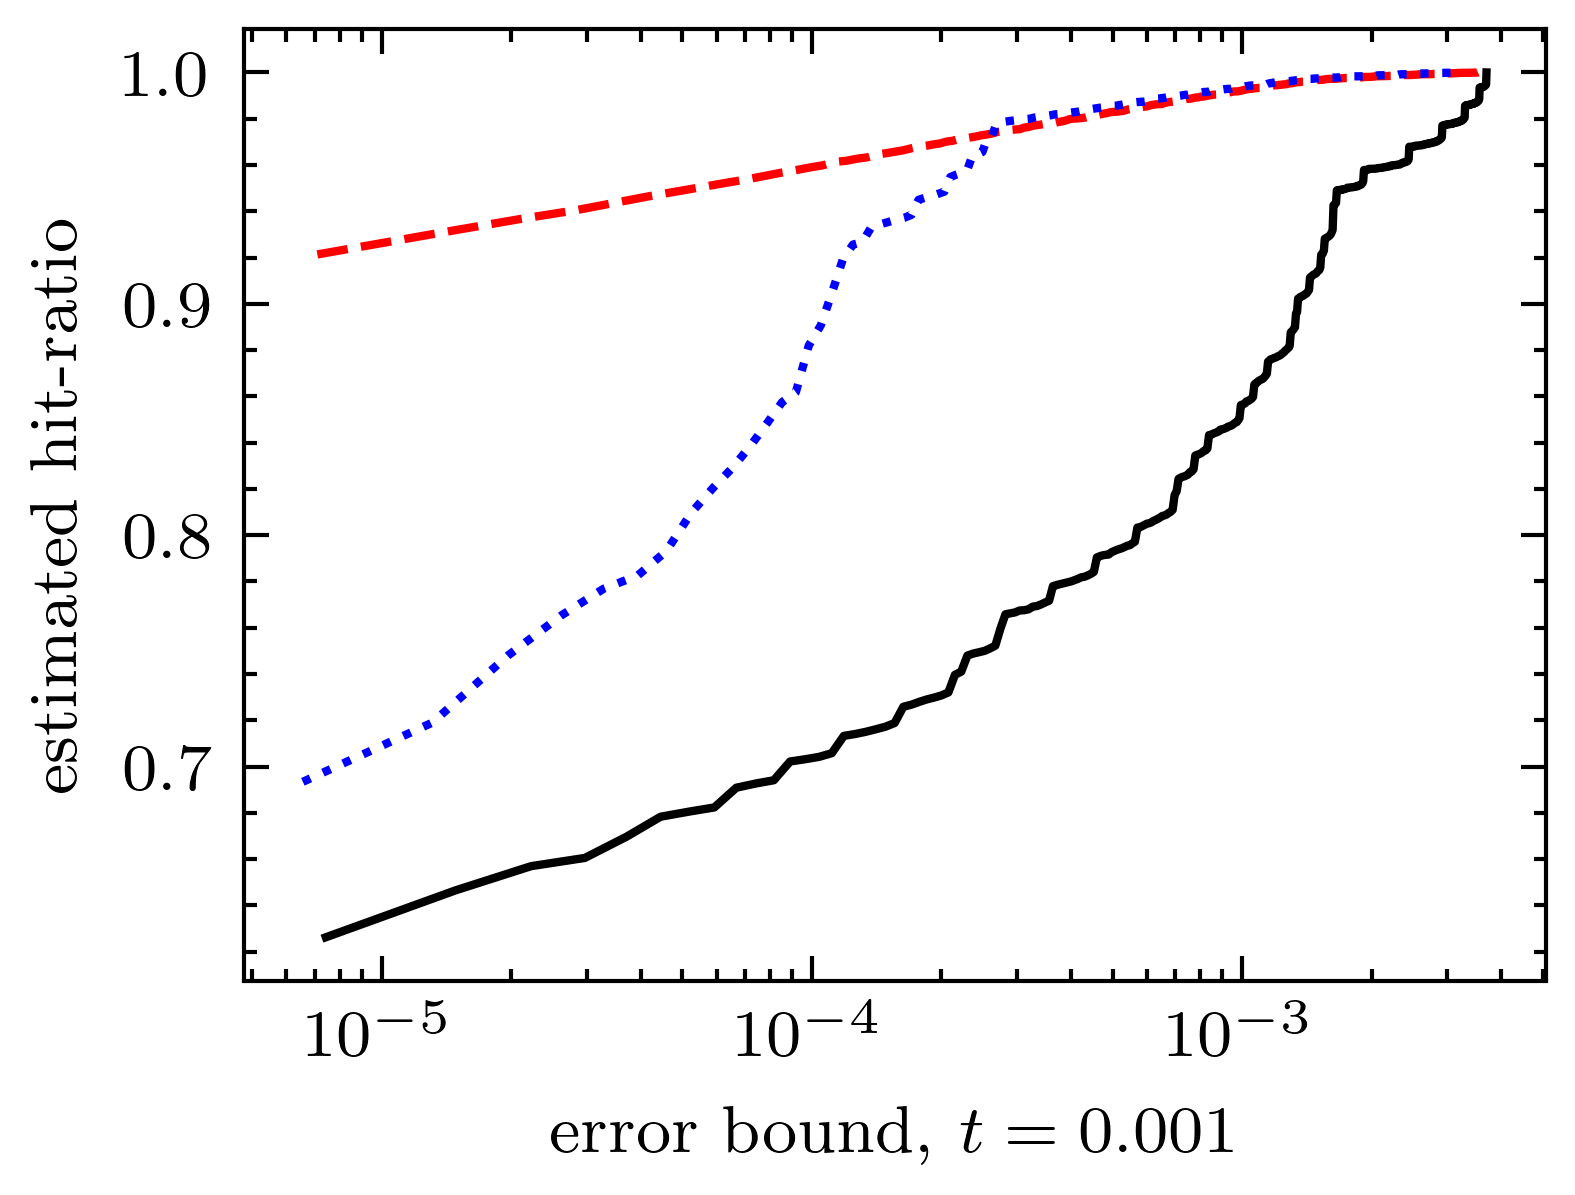

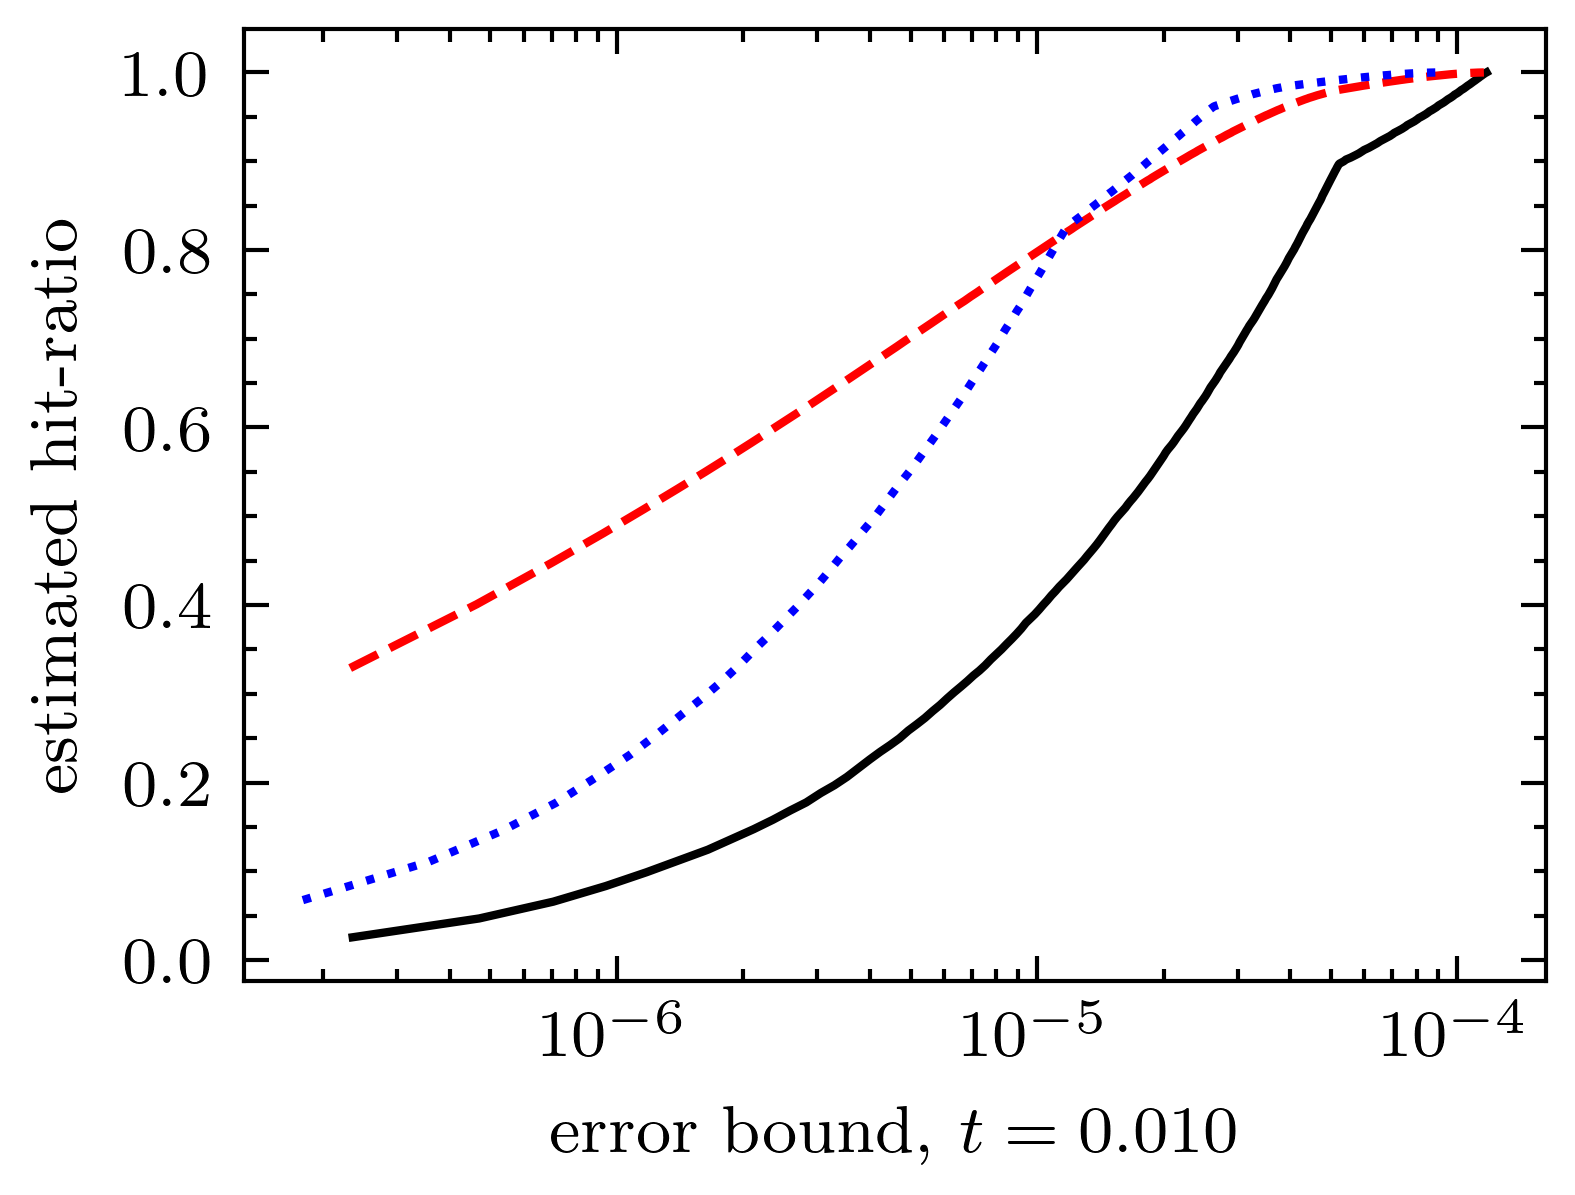

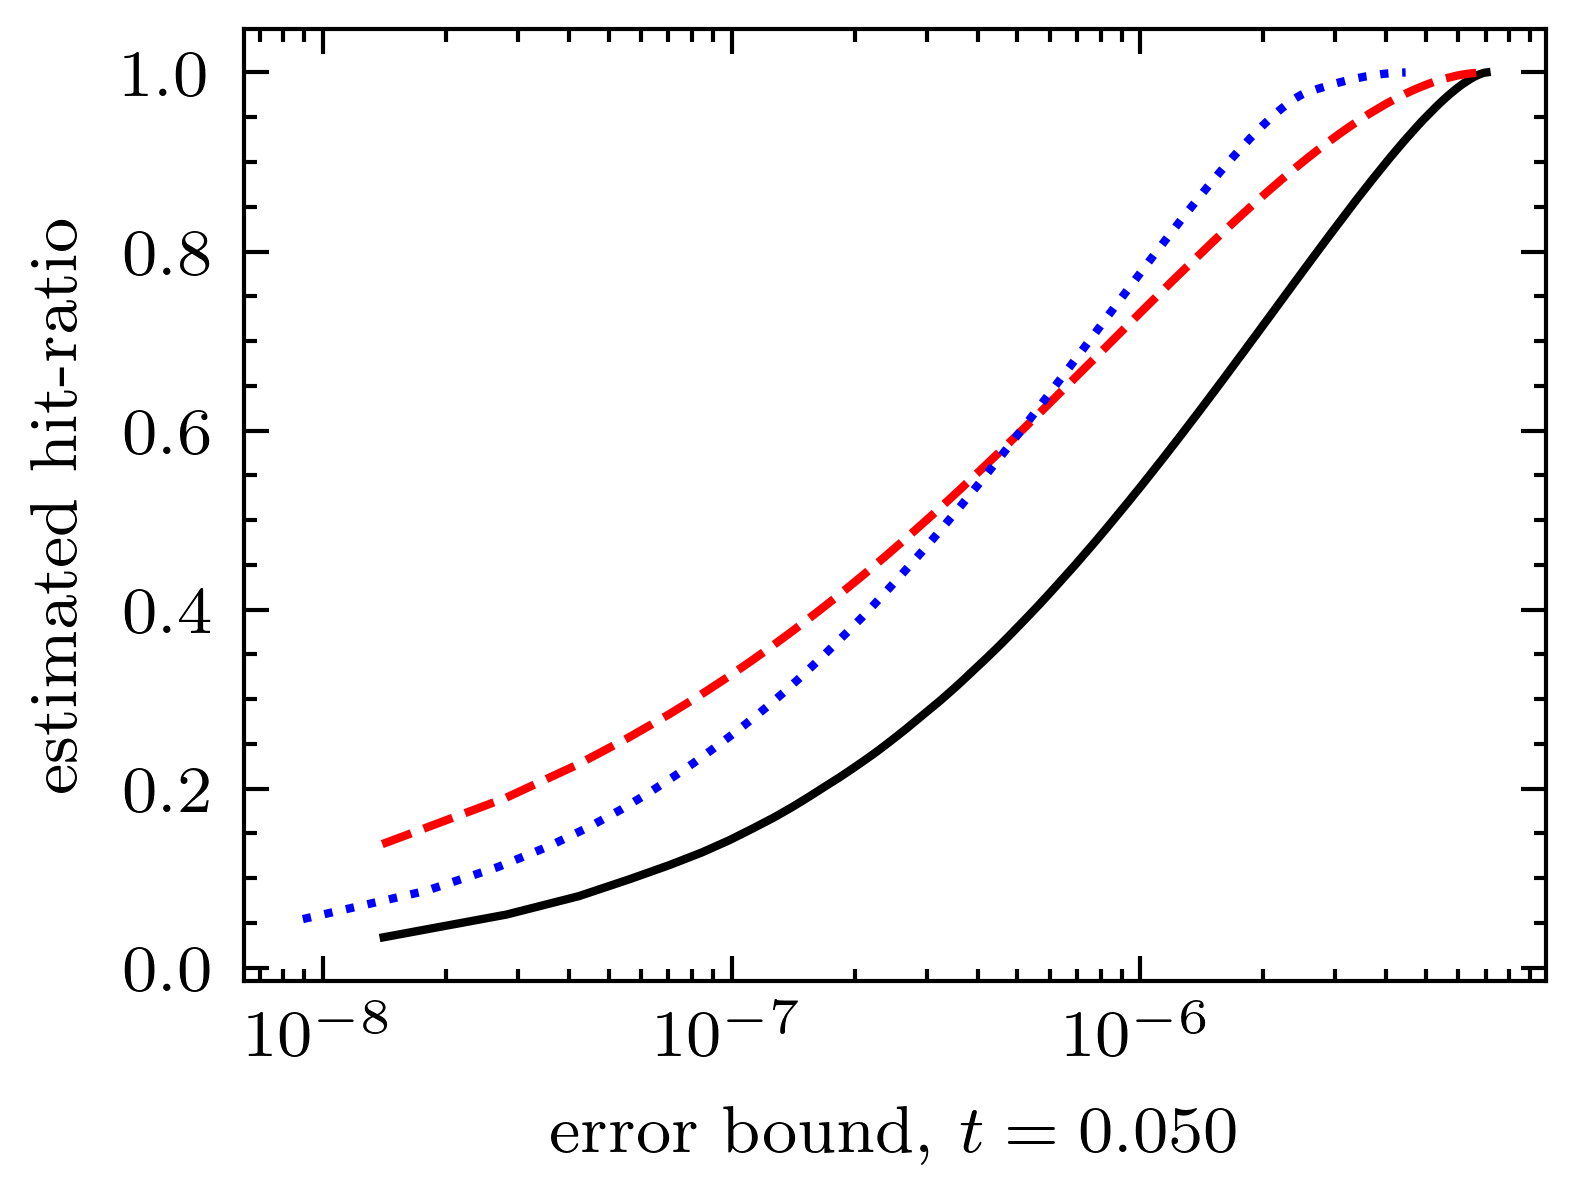

In [184]:
for t in [0.001,0.01,0.05]:
    factor = 1280*N**(-3)/6
    fig = plt.figure(figsize=(2.8,2.1))
    ax = fig.add_subplot(1,1,1)
    ax.plot(np.exp(hitratios[t][0][0])*factor, hitratios[t][0][1])
    ax.plot(np.exp(hitratios[t][1][0])*factor, hitratios[t][1][1])
    ax.plot(np.exp(hitratios[t][2][0])*factor, hitratios[t][2][1])
    ax.set_xlabel("error bound, $t=%.3f$"%t)
    ax.set_ylabel("estimated hit-ratio")
    ax.set_xscale("log")